In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head(300))

           Дата  Склад  Контрагент Номенклатура  Количество
0    2018-01-04      1   address_0    product_0           4
1    2018-01-04      1   address_0    product_1           4
2    2018-01-04      1   address_0    product_2           5
3    2018-01-04      1   address_0    product_3          10
4    2018-01-04      1   address_0    product_4           2
..          ...    ...         ...          ...         ...
295  2018-01-04      1  address_22   product_14           1
296  2018-01-04      1  address_22   product_22           3
297  2018-01-04      1  address_22   product_15           0
298  2018-01-04      1  address_22   product_17           3
299  2018-01-04      1  address_23    product_0           3

[300 rows x 5 columns]


Проверяем формат столбцов

In [3]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [4]:
df["Дата"] = pd.to_datetime(df["Дата"])

print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [20]:
grouped_df = (
    df.groupby("Дата")["Количество"]
    .sum()
    .reset_index(name="Количество продаж")
)
print(grouped_df)

          Дата  Количество продаж
0   2018-01-04               3734
1   2018-01-05               3643
2   2018-01-06               3193
3   2018-01-07               3298
4   2018-01-09               4055
..         ...                ...
200 2018-08-26               5302
201 2018-08-28               5983
202 2018-08-29               4969
203 2018-08-30               4648
204 2018-08-31               4570

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [21]:
grouped_df.head()

,Дата,Количество продаж
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

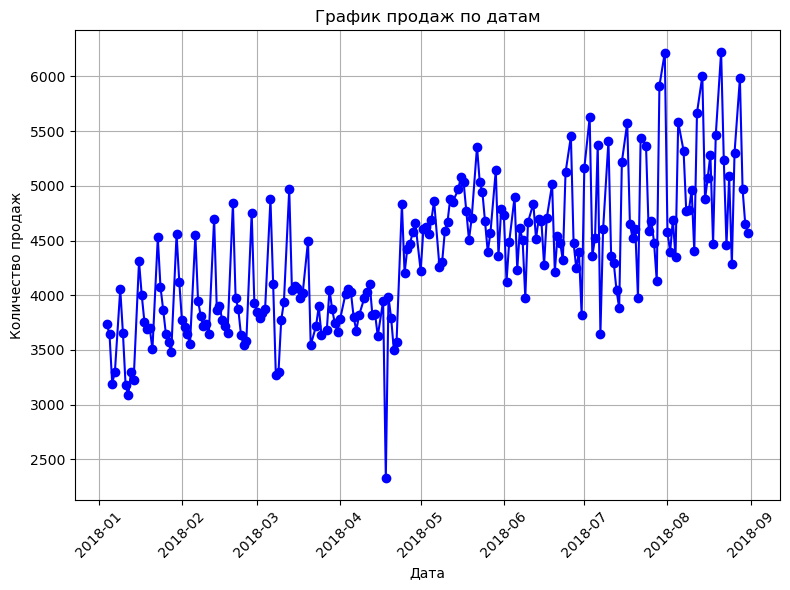

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(grouped_df["Дата"], grouped_df["Количество продаж"], marker='o', linestyle='-', color='b')

plt.title('График продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [11]:
Рост тренда идет количество продаж постепенно увеличивается от начала года к лету.
Волатильность наблюдаются резкие колебания количества продаж от одного дня к другому, что может быть связано с сезонными факторами или разовыми акциями.
В апреле виден резкий спад количества продаж.

SyntaxError: invalid syntax (3686737941.py, line 1)

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [24]:
# Рассчитаем основные метрики
Q1 = df["Количество"].quantile(0.25)  # Первый квартиль (25-й перцентиль)
Q3 = df["Количество"].quantile(0.75)  # Третий квартиль (75-й перцентиль)
IQR = Q3 - Q1  # Межквартильный размах

# Условия для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация выбросов
outliers = df[(df["Количество"] < lower_bound) | (df["Количество"] > upper_bound)]

# Найдем строку с максимальным выбросом
max_outlier = outliers.loc[outliers["Количество"].idxmax()]

print("Строка с максимальным выбросом:")
print(max_outlier)

Строка с максимальным выбросом:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [25]:

filtered_df = df[
    (df["Дата"].dt.month.isin([6, 7, 8])) & 
    (df["Дата"].dt.weekday == 2) &          
    (df["Склад"] == 3)                       
]

top_item = (
    filtered_df.groupby("Номенклатура")["Количество"]
    .sum()
    .reset_index()
    .sort_values(by="Количество", ascending=False)
    .head(1)  
)

print("Топовый товар по продажам по средам за лето на складе №3:")
print(top_item)

Топовый товар по продажам по средам за лето на складе №3:
  Номенклатура  Количество
1    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [26]:
weather_d = pd.read_csv('янвавг.csv')
weather_d.head()

,Дата,Средняя температура за день
0,31.08.2018,11
1,30.08.2018,14
2,29.08.2018,13
3,28.08.2018,14
4,27.08.2018,12


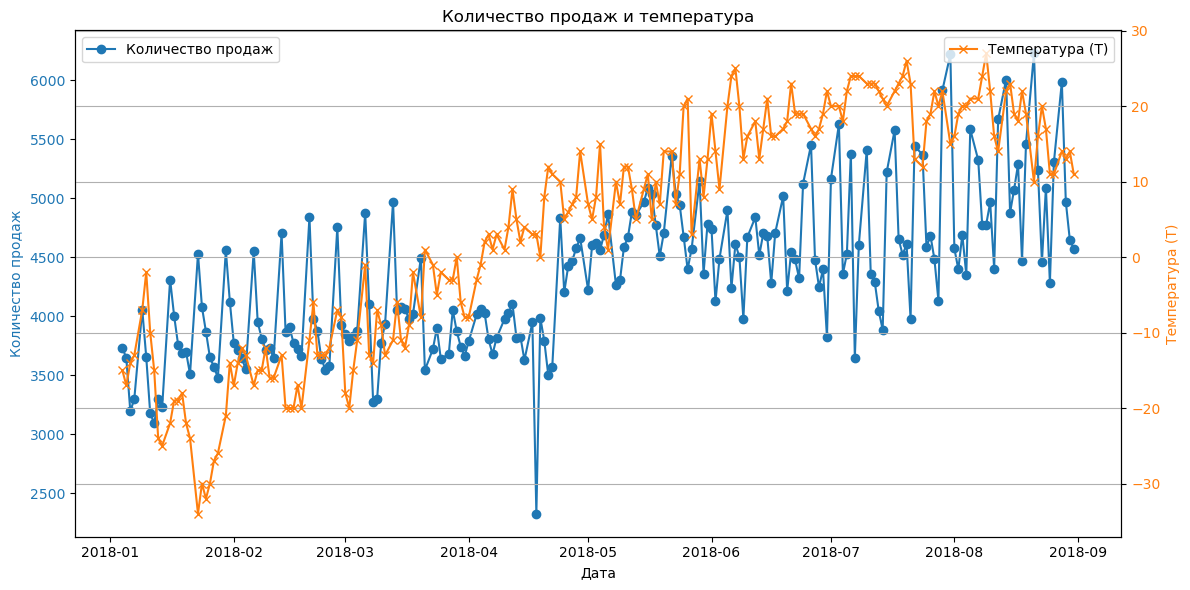

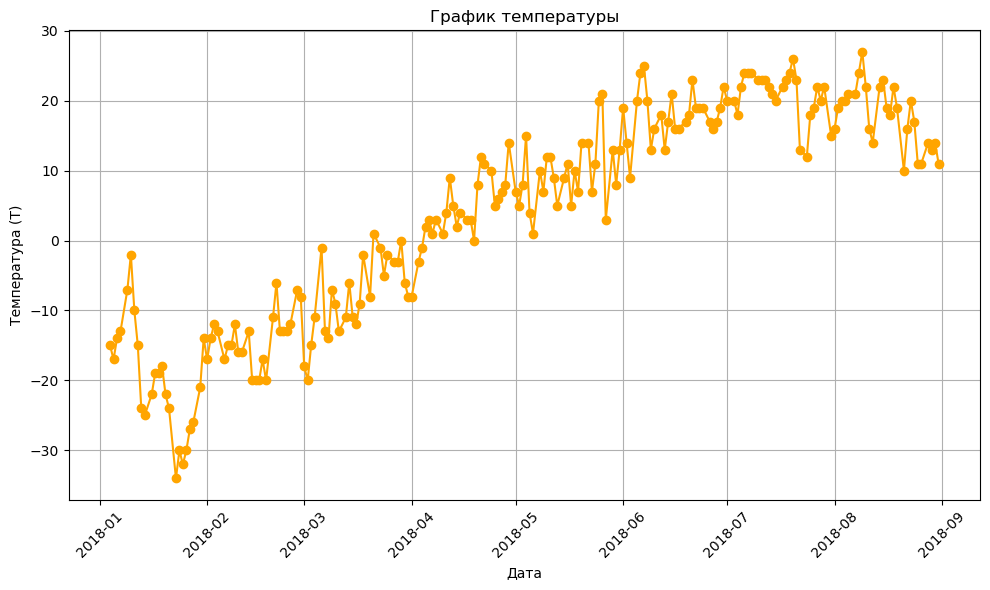

In [29]:
weather_d["Дата"] = pd.to_datetime(weather_d["Дата"], format="%d.%m.%Y")


weather_d.rename(columns={"Средняя температура за день": "T"}, inplace=True)


merged_df = pd.merge(grouped_df, weather_d, on="Дата", how="inner")


fig, ax1 = plt.subplots(figsize=(12, 6))


color = 'tab:blue'
ax1.set_xlabel("Дата")
ax1.set_ylabel("Количество продаж", color=color)
ax1.plot(merged_df["Дата"], merged_df["Количество продаж"], label="Количество продаж", color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="upper left")


ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel("Температура (T)", color=color)
ax2.plot(merged_df["Дата"], merged_df["T"], label="Температура (T)", color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="upper right")


plt.title("Количество продаж и температура")
fig.tight_layout()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(merged_df["Дата"], merged_df["T"], label="Температура (T)", color='orange', marker='o')
plt.title("График температуры")
plt.xlabel("Дата")
plt.ylabel("Температура (T)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()